# DSM_0313 
## 主題: 【特徵工程2: 文字特徵萃取實作】
### 專案目標: 
- 專案重點:
    -   **特徵工程**：特徵構建、特徵轉換、特徵萃取、特徵選擇
        - 文字特徵處理: Bag of Words, TF-IDF, Word2Vec、BERT，NLP的東西
        - 影像特徵處理: HOG, SIFT, SURF, CNN(下周再說講不完QQ)

- Host: Isaac
- Time: 2025/03/13
- 參考書目: 
    - 機器學習 特徵工程 : 資料科學家需學的原理與技術 by Alice Zheng, Amanda Casari
    - https://medium.com/data-science-navigator/%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-%E7%89%B9%E5%BE%B5%E5%B7%A5%E7%A8%8B-e5ae383def50    
    - https://www.showmeai.tech/article-detail/208

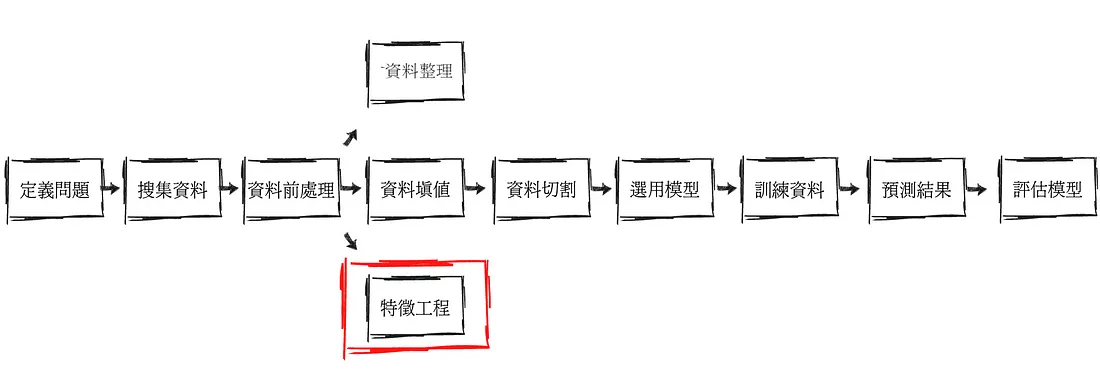


## 0. 為什麼我們需要特徵工程?
### a. 加速模型的速度與效能
就像是你要跑一場馬拉松，你需要一雙好鞋子，一個訓練有素的身體，以及一個好的心態。在機器學習中，模型就像是選手，而特徵工程就是讓選手更輕便且強化你表現的裝備。

`特徵越好，模型越簡單性能越好`
### b. 合理性
去除掉不合理的特徵，讓模型更加合理之外，也可以讓後續的分析人員解讀時，不會將不合理的特徵納入解釋。


## 1. 特徵構建（Feature Creation）
從原始數據中創造新的、有價值的特徵，通常基於domain knowledge以及對數據的理解。
基本上最常見的就是對現有的特徵做加減乘除的操作，或是將特徵進行組合。


### 統計特徵
- 平均值
- 標準差
- 最大值、最小值
- 中位數
- 眾數
- 四分位數
- 偏度
- 峰度
- 短期統計量(日、周、月)

### 週期值
某些情境下(例如:電商)，數據有週期性，這時我們可以將週期性的特徵提取出來。

- 每五天上班日的平均營業額

### 特徵分箱(離散化)
將連續特徵切分成多個區間，可以降低雜訊的影響，也可以將連續特徵轉換成類別特徵。


## 案例分享
### 案例1: 汽車維修資料
今天有一汽車進廠維修修資料，有當初汽車製造的日期和維修當天的日期，我們可以透過這兩個特徵計算出進場時汽車的使用年限。

### 案例2: 全台確診資料
由於每個縣市的總人口數不同，造成在分析上單純以確診人數來看，會有偏差。因此我們可以透過確診人數除以總人口數，得到確診率，這樣就可以更客觀的比較各縣市的確診情況。

## 2. 特徵轉換（Transformations）
對現有特徵進行數學轉換，使其更適合模型學習。

### 特徵編碼
- 類別特徵: One-hot encoding, Label encoding
- 標籤二值化: 將連續特徵轉換成二值特徵。

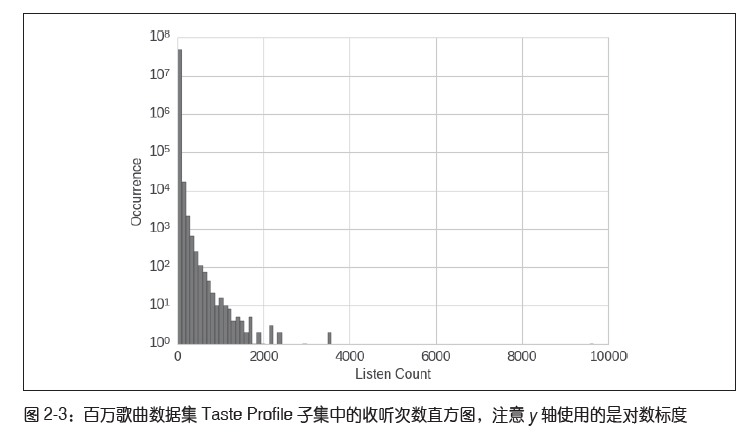


### 特徵縮放
- 標準化: Z-score normalization
- 最大最小化: Min-max scaling
- 正規化: Normalization

### 非線性轉換
對數據進行 非線性函數變換，使其變得更適合模型學習，特別是在**數據分佈不均勻**或**變化關係不是線性**時。

- 對數轉換
- 平方根轉換
- Box-Cox轉換
- 指數轉換



## 3. 特徵萃取（Feature Extraction）

進入到今天的重點，特徵萃取。

與特徵建構不同的地方是，特徵萃取主要是`從高維或非結構化數據（如圖片、文本、聲音）中提取關鍵特徵，「降低」資料的欄位數，將最符合最代表資料的內涵萃取出來。`

今天我們的目標是構建一個基於 `NLP` 的商品推薦系統。當用戶輸入一段描述（如：「我想買一台適合玩遊戲的筆記型電腦」），系統將根據這段文字，推薦與需求匹配的商品。

流程可能是這樣：
1. 用戶輸入文字
2. 系統將文字轉換為特徵
3. 系統根據特徵找到與之最相似的商品
4. 系統將推薦商品返回給用戶

所以!

我們首先要讓電腦理解這段文字，這就是我們今天要介紹的`文字特徵處理`。

### 文字特徵處理
今天我們會介紹四個常見的文字特徵處理方法：
- Bag of Words
- TF-IDF
- Word2Vec4
- BERT

但在這之前，我們先來看看什麼是`NLP`。

#### NLP(Natural Language Processing)
自然語言處理 (NLP) 是一種機器學習技術，讓電腦能夠解譯、操縱及理解人類語言。如今，組織擁有來自各種通訊管道的大量語音和文字資料，例如電子郵件、簡訊、社交媒體新聞摘要、影片、音訊等。他們使用 NLP 軟體來自動處理此資料，分析訊息中的意圖或情緒，並即時回應人類通訊。
[參考資料](https://aws.amazon.com/tw/what-is/nlp/)

#### 語言模型(Language Model)
語言模型指的就是一種將`文字轉為數字`表達的方法。

### 3.1 詞袋模型(Bag of Words)
這個是最簡單的模型，它將文本中的每個單詞當作一個特徵，然後計算每個單詞在文本中出現的次數。

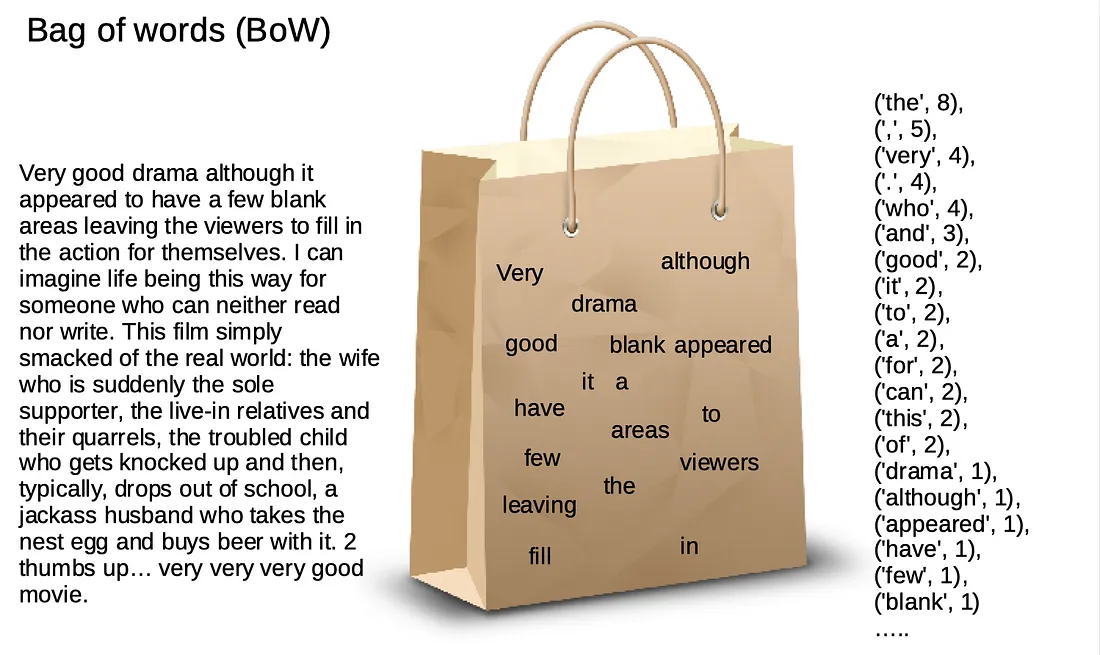


[參考資料](https://medium.com/@derekliao_62575/nlp%E7%9A%84%E5%9F%BA%E6%9C%AC%E5%9F%B7%E8%A1%8C%E6%AD%A5%E9%A9%9F-ii-bag-of-words-%E8%A9%9E%E8%A2%8B%E8%AA%9E%E8%A8%80%E6%A8%A1%E5%9E%8B-3b670a0c7009)


In [20]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# 建立文本資料
corpus = [
    "I love machine learning",
    "Machine learning is amazing",
    "I love deep learning"
]

# 初始化 CountVectorizer（詞袋模型）
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# 顯示詞彙對應的索引
print("詞彙索引：", vectorizer.vocabulary_)

# 顯示詞頻矩陣
print("詞頻矩陣：\n", X.toarray())


詞彙索引： {'love': 4, 'machine': 5, 'learning': 3, 'is': 2, 'amazing': 0, 'deep': 1}
詞頻矩陣：
 [[0 0 0 1 1 1]
 [1 0 1 1 0 1]
 [0 1 0 1 1 0]]


### 3.1.1 bag-of-n-grams 
N-Grams 是 詞袋模型（BoW）的一種擴展，考慮「連續 N 個單詞」的組合，例如：
- 1-gram (unigram)：「I」、「love」、「machine」、「learning」
- 2-gram (bigram)：「I love」、「love machine」、「machine learning」
- 3-gram (trigram)：「I love machine」、「love machine learning」

優勢：
能夠部分捕捉上下文資訊，避免 BoW 忽略單詞順序。
例如：「New York」和「York New」在 BoW 可能被視為相同，但在 2-gram 中則不同。

缺點：
增加維度，特徵數量變得更多（特別是使用 3-gram 或更大）。

In [24]:
# 初始化 CountVectorizer（使用 bigram 和 trigram）
vectorizer_ngram = CountVectorizer(ngram_range=(1, 2))
X_ngram = vectorizer_ngram.fit_transform(corpus)

# 顯示 N-Grams 詞彙索引
print("N-Grams 詞彙索引：", vectorizer_ngram.vocabulary_)

# 顯示 N-Grams 特徵矩陣
print("N-Grams 特徵矩陣：\n", X_ngram.toarray())

N-Grams 詞彙索引： {'love': 7, 'machine': 10, 'learning': 5, 'love machine': 9, 'machine learning': 11, 'is': 3, 'amazing': 0, 'learning is': 6, 'is amazing': 4, 'deep': 1, 'love deep': 8, 'deep learning': 2}
N-Grams 特徵矩陣：
 [[0 0 0 0 0 1 0 1 0 1 1 1]
 [1 0 0 1 1 1 1 0 0 0 1 1]
 [0 1 1 0 0 1 0 1 1 0 0 0]]


但有沒有發現這樣做的缺點:
- 會忽略單詞的順序
- 會忽略句子的語法、語意
- 向量表達過於稀疏(sparse)
- 維度爆炸

因此，衍生出了下面這種方式，`TF-IDF`。

### 3.2 TF-IDF
在 BoW/N-gram 的基礎上，給予常見詞較低的權重，稀有詞較高的權重。

#### TF (Term Frequency)
「詞頻」指的是一個詞在一個文件中出現的頻率，因此一個詞TF越高，可能就代表他在這篇文章中沒那麼重要，例如英文的 “the”, “a” 還有中文的「的」、「了」等等，這些字都很常出現，但沒什麼意義。

#### IDF (Inverse Document Frequency)
「逆文件詞頻」指的是所有文件的數量和包含特定詞文件的數量的比率。大家可以想像，如果一個詞在一個文件中很常出現，但在別的文件中非常少出現，那是不是就代表這個詞對這篇文章來說很重要呢？


#### 小結
TF-IDF 就是將這兩個概念結合起來，讓我們可以找出在這篇文章中哪些詞是比較重要的，將TF乘上IDF，獲取一個能代表一個詞在文件中重要程度的數值，這個數值就是TF-IDF值。

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 初始化 TF-IDF 向量化
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # 包含 unigram 和 bigram
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# 顯示詞彙對應的索引
print("TF-IDF 詞彙索引：", tfidf_vectorizer.vocabulary_)

# 顯示 TF-IDF 矩陣
print("TF-IDF 矩陣：\n", X_tfidf.toarray())


TF-IDF 詞彙索引： {'love': 7, 'machine': 10, 'learning': 5, 'love machine': 9, 'machine learning': 11, 'is': 3, 'amazing': 0, 'learning is': 6, 'is amazing': 4, 'deep': 1, 'love deep': 8, 'deep learning': 2}
TF-IDF 矩陣：
 [[0.         0.         0.         0.         0.         0.33631504
  0.         0.43306685 0.         0.56943086 0.43306685 0.43306685]
 [0.4261835  0.         0.         0.4261835  0.4261835  0.25171084
  0.4261835  0.         0.         0.         0.32412354 0.32412354]
 [0.         0.50461134 0.50461134 0.         0.         0.29803159
  0.         0.38376993 0.50461134 0.         0.         0.        ]]


雖然解決了重要程度的問題，但是還是有一些問題:
- 語意、順序
- 維度爆炸
- 長文本處理不易

## 3.3 Word2Vec
Word2Vec 是 Google 在 2013 年提出的一種詞向量表示方法，它可以將詞向量化，讓詞之間的關係可以用向量的方式表示。 

在這之前，我們要先了解一下`詞向量`。

### 3.3.0 詞向量
詞向量是一種將詞彙轉換為向量的技術，這樣我們就可以用數學的方式來計算詞之間的相似度。

Embedding，中文的意思是嵌入的意思，在這裡的意思是一個空間概念，並且在其中有可以表達得自己的一個形式。 空間概念可能有很多種不同的空間概念，舉例像是我們最熟悉的座標空間x軸，y軸，z軸，並且當我們給定一組(x,y,z)之後我們可以得到一個對應的位置。


#### 將文字轉成向量? 向量是甚麼
向量可以用來表示空間中的一個點，或者表示一個方向和大小。
在機器學習中，我們可以用向量來表示一個詞，這樣我們就可以用數學的方式來計算詞之間的相似度。

通常我們有兩種方式計算詞之間的相似度:

- Euclidean Distance(歐幾里得距離)
- Cosine Similarity(餘弦近似值)

#### Euclidean Distance
沒錯，就是`畢氏定理`的應用。

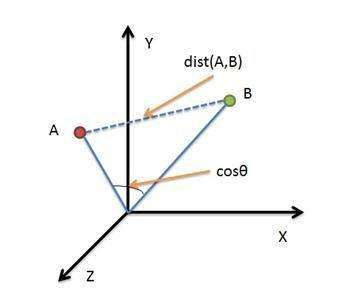

在歐氏距離中的延伸就是`曼哈頓距離`，這個距離是指兩點之間的絕對距離，也就是說，它是沿著網格線的路徑來測量的。

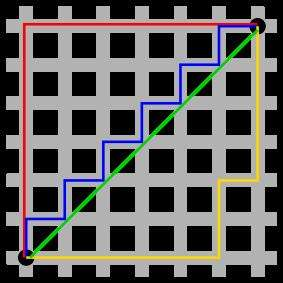

綠色的線是歐氏距離，其他的都是曼哈頓距離。

#### Cosine Similarity
餘弦相似度是一種用來衡量兩個向量方向的相似度的方法，這個方法是用兩個向量的夾角的餘弦值來表示的。

藉由向量的內積運算可以找出兩向量的夾角。對於長度特性並不重要的向量來說，餘弦相似度是一個很好的方法。
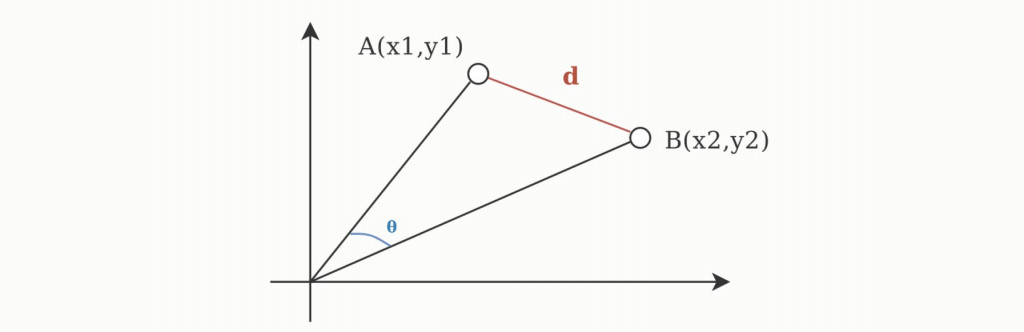

`歐氏距離體現數值上的絕對差異，而餘弦距離體現方向上的相對差異。`

#### 比較文字相似度
Word Embedding 最在乎的就是`距離`，也就是像不像。
word embedding 向量將語意資訊隱藏在各個維度的數值裡。向量的方向有意義，而長度並不重要，因此用 cosine distance 來衡量 word embeddings 的距離再適合不過了！

在自然語言處理的實務上，使用cosine distance 來衡量距離有以下好處：

- 文本相似度往往與文本的長度無關，因此夾角的大小足以衡量距離的長短
- word embeddings 的維度通常很高，歐氏距離或曼哈頓距離的數值也會非常可觀，而 cosine distance 只會落在-1到1之間
- 餘弦值的計算複雜度較低，這項優勢在處理稀疏向量（ sparse vectors ，指的是大部分數值皆為0的向量，例如之前提過的 one-hot encoded vectors ）上非常明顯


[參考資料1](https://medium.com/qiubingcheng/%E6%AD%90%E6%B0%8F%E8%B7%9D%E9%9B%A2%E8%88%87%E9%A4%98%E5%BC%A6%E7%9B%B8%E4%BC%BC%E5%BA%A6%E7%9A%84%E6%AF%94%E8%BC%83-c78163ad51b)

[參考資料2](https://scm_mos.gitlab.io/algorithm/distance-similarity-measures/)

[參考資料3](https://ithelp.ithome.com.tw/articles/10268777)

[參考資料4](https://medium.com/royes-researchcraft/%E8%87%AA%E7%84%B6%E8%AA%9E%E8%A8%80%E8%99%95%E7%90%86-1-word-to-vector-%E5%AF%A6%E4%BD%9C%E6%95%99%E5%AD%B8-99b668faa296)

In [27]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import pandas as pd

corpus = [
    "I love math",
    "I love programming",
    "I love machine learning",
    "I love deep learning"
]

# 初始化 CountVectorizer（詞袋模型）
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()  # 轉換為稠密矩陣

# 計算歐式距離
euclidean_dist = euclidean_distances(X)

# 計算餘弦相似度
cosine_sim = cosine_similarity(X)


# 將結果轉換為 DataFrame 便於顯示
euclidean_df = pd.DataFrame(euclidean_dist, index=corpus, columns=corpus)
cosine_df = pd.DataFrame(cosine_sim, index=corpus, columns=corpus)

# 顯示歐式距離和餘弦相似度矩陣
print("📌 歐式距離矩陣：")
print(euclidean_df, "\n")

euclidean_df

# print("📌 餘弦相似度矩陣：")
# print(cosine_df)


📌 歐式距離矩陣：
                         I love math  I love programming  \
I love math                 0.000000            1.414214   
I love programming          1.414214            0.000000   
I love machine learning     1.732051            1.732051   
I love deep learning        1.732051            1.732051   

                         I love machine learning  I love deep learning  
I love math                             1.732051              1.732051  
I love programming                      1.732051              1.732051  
I love machine learning                 0.000000              1.414214  
I love deep learning                    1.414214              0.000000   



,I love math,I love programming,I love machine learning,I love deep learning
I love math,0.000000,1.414214,1.732051,1.732051
I love programming,1.414214,0.000000,1.732051,1.732051
I love machine learning,1.732051,1.732051,0.000000,1.414214
I love deep learning,1.732051,1.732051,1.414214,0.000000



### 3.3.1 Word2Vec的兩種模型
**Word2Vec** 是一種將單詞轉換為**向量**的機器學習技術。  
它的目標是**讓詞語之間的語義可以用數學方式表示**，例如：
- **"King - Man + Woman ≈ Queen"**（國王 - 男人 + 女人 ≈ 女王）
- **"Paris - France + Germany ≈ Berlin"**（巴黎 - 法國 + 德國 ≈ 柏林）

與傳統的詞袋模型（BoW）或 TF-IDF 不同，Word2Vec 能夠：
- 捕捉詞語的語義關係  
- 理解詞語之間的上下文關係 
- 使相似詞的向量彼此接近

有兩種方式可以實現 Word2Vec：
- **CBOW (Continuous Bag of Words)**：根據上下文詞預測目標詞
- **Skip-gram**：根據目標詞預測上下文詞

#### CBOW (Continuous Bag of Words)
CBOW 模型是根據上下文詞預測目標詞，例如今天的字句是"I love machine learning"，我們可以用 "I", "machine", "learning" 來預測 "love"。
優點是：

- 訓練速度快
- 對高頻詞效果好

#### Skip-gram
Skip-gram 模型是根據目標詞預測上下文詞，例如今天的字句是"I love machine learning"，我們可以用 "love" 來預測 "I", "machine", "learning"。


### 小結
CBOW就像是你從一群朋友的描述中，去猜測這個朋友是誰一樣。

Skip-gram則是你從一個人的人名中，去猜測這個人的特徵。

In [8]:
!pip install --upgrade gensim


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from gensim.models import Word2Vec

# 訓練語料
sentences = [
    ["I", "love", "machine", "learning"],
    ["Machine", "learning", "is", "amazing"],
    ["Deep", "learning", "is", "powerful"],
    ["I", "love", "deep", "learning"],
    ["Natural", "language", "processing", "is", "interesting"],
    ["Artificial", "intelligence", "is", "revolutionary"]
]

# 訓練 Word2Vec 模型
model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=0)  # sg=0 表示 CBOW, sg=1 表示 Skip-gram

# 取得 "learning" 的詞向量
print("📌 'learning' 的詞向量：\n", model.wv["learning"])

# 找出與 "learning" 最相似的詞
print("📌 與 'learning' 最相似的詞：\n", model.wv.most_similar("learning"))


📌 'learning' 的詞向量：
 [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
📌 與 'learning' 最相似的詞：
 [('is', 0.5437942743301392), ('deep', 0.431887149810791), ('revolutionary', 0.3792896568775177), ('I', 0.30042386054992676), ('Natural', 0.22743143141269684), ('Artificial', 0.15579193830490112), ('love', 0.10494352877140045), ('amazing', -0.1311161071062088), ('Machine', -0.1897382140159607), ('interesting', -0.2057320922613144)]


Word2vec已經很不錯了對吧?

但還是有一些缺點:
1. **同詞不同意義的字詞他分辨不出來**

    例如: 
    - 我很喜歡吃蘋果
    - 我手機是蘋果的

        雖然我們能知道第二個蘋果是品牌，但word2vec卻無法分辨。

2. **Word2Vec 只考慮單向上下文**

    他只考慮前後文的關係，但卻無法考慮到更遠的關係，當今天輸入一長串文字時，他無法理解整個句子的結構。

3. **Word2Vec 只能學習單個詞**

    只能學習詞與詞之間的關係，無法理解整個句子的結構。


這時候，我們需要: 能理解文字意涵，而且可以處理更複雜的語言結構，這就是`BERT`。

## 3.4 BERT
BERT（Bidirectional Encoder Representations from Transformers）是一種自然語言處理模型，由 Google 在 2018 年提出。
BERT 是一種預訓練語言模型，透過雙向（Bidirectional）設計讓模型能夠考慮文本字詞的前後關係，並且可以處理更複雜的語言結構。


與 Word2Vec 不同，`BERT` 是 基於 `Transformer`，可以同時考慮 單詞的前後文資訊。

至於transformer是甚麼呢? 我們有機會再介紹，裡面的self-attention機制可以讓模型計算出每個詞與其他詞之間的關係，這樣模型就可以理解整個句子的結構。

### 補充: 預訓練
預訓練是指在大量的文本資料上訓練模型，讓模型學習到文本的語義和結構，並將學習到的知識保存在模型的權重中。
後續我們要使用時，進行微調，讓模型學習到我們的任務即可。


### 3.4.1 BERT的流程

BERT的機制可分為三大部分：模型輸入、Encoder、最終輸出。
但在這個部分，需要了解到更多有關於transformer的機制，這樣才能更好的理解BERT。我們這邊先簡單帶過。

#### **BERT 在做什麼？**
BERT 主要在做 **"填空題" + "問答題"** 來學習語言。

- **填空題**（Masked Language Model, MLM）：
  - 給 BERT 一個句子，隱藏其中一個詞，讓它猜測這個詞應該是什麼。
  - 例子：
    ```
    "今天的天氣很 [MASK]。"
    ```
    - BERT 可能會猜測：
      - "今天的天氣很 **好**。" ✅
      - "今天的天氣很 **糟**。" ✅
      - "今天的天氣很 **機器人**。" ❌（這不合理）

- **問答題**（Next Sentence Prediction, NSP）：
  - 給 BERT 兩個句子，讓它判斷這兩個句子是否有關聯。
  - 例子：
    ```
    句子 A: "我今天去超市買東西。"
    句子 B: "我買了一些水果和蔬菜。"
    ```
    - BERT 會判斷這兩句是**有關聯的**。✅

#### **BERT 如何處理輸入？**
當你給 BERT 一段文字，它會先把這些文字轉換成**數字向量**，然後透過 **Transformer 模型** 來學習語意。

1. **輸入格式**
   - BERT 會在句子的開頭加上 `[CLS]`（代表整個句子）
   - 兩個句子之間加上 `[SEP]`（分隔符號）
   ```
   [CLS] 這 是 一 個 句 子 [SEP] 這 是 另 一 個 句 子 [SEP]
   ```

2. **詞嵌入（Embedding）**
   - BERT 把每個詞轉換成**數字向量**（因為 AI 不懂文字，只懂數字）。
   - 例如：
     ```
     "貓" → [0.1, 0.8, -0.3, ...]  (這是一個數字向量)
     "狗" → [0.2, 0.7, -0.5, ...]
     ```
   - 如果兩個詞的向量很接近，表示它們的意思相似。

3. **BERT 透過 Transformer 來學習語意**
   - Transformer 使用「**自注意力機制（Self-Attention）**」來理解整個句子的關係。
   - 這讓 BERT **可以同時看到句子的前後文，而不像傳統方法只能從左讀到右**。

4. **最終輸出**
   - BERT 會根據不同的 NLP 任務輸出不同的結果，例如：
     - **文本分類（情感分析）** → 判斷是正面還是負面情緒
     - **問答系統** → 找出答案所在的句子
     - **文本相似度** → 比較兩段文字的相似程度




[參考資料](https://edge.aif.tw/aicafe-bert-20220728/)

In [34]:
# 重新載入所需的套件
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# 檢查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("使用裝置：", device)

# 載入 BERT 模型和 Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased").to(device)

# 定義兩個句子
text1 = "Data science is good, machine learning is good"
text2 = "fffffffffffff gujgglyg vgyyyy hyyyyyyy21652"

# 讓 BERT 轉換這兩個句子
tokens1 = tokenizer(text1, return_tensors="pt").to(device)
tokens2 = tokenizer(text2, return_tensors="pt").to(device)

# 取得 BERT 的輸出向量
with torch.no_grad():
    output1 = model(**tokens1)
    output2 = model(**tokens2)

# 提取 [CLS] 向量（代表整句話的意思）
embedding1 = output1.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
embedding2 = output2.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

# 計算餘弦相似度
similarity = cosine_similarity([embedding1], [embedding2])[0][0]

# 顯示結果
similarity

使用裝置： cuda


0.76148164

BERT 還有延伸出更多的模型，例如: `RoBERTa`、`BERTopic`、`Setence-BERT`等等，這些模型都是基於BERT的基礎上進行改進，讓模型更加強大。

## 3.5 過濾文字特徵（Filtering Text Features）
在文本處理過程中，有些字詞對於機器學習模型的效果影響不大，甚至可能影響模型的準確度，因此我們可以透過**過濾文字特徵**來提升模型效能。

這裡介紹三種常見的文字過濾方法：
1. **常用詞過濾（Stopwords Filtering）**
2. **頻率過濾（Frequency Filtering）**
3. **詞幹提取（Stemming & Lemmatization）**


### 3.5.1 常用詞過濾（Stopwords Filtering）
就正常的文具而言，像是「的、是、在、有、我、你、他」等這些詞在文本中出現的頻率很高，但對於文本的語意影響不大，因此可以將這些詞過濾掉，保留有意義的關鍵字。

- 這些詞通常被稱為 **"Stopwords"（停用詞）**，可以透過 `nltk` 或 `sklearn` 來移除。



In [11]:
!pip install --upgrade nltk


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.5 MB 365.7 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.5 MB 958.4 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 4.4 MB/s eta 0:00:01

In [17]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# 下載停用詞
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # 將集合轉換為列表

# 原始文本
corpus = ["I love machine learning and artificial intelligence",
          "Machine learning is amazing but deep learning is powerful",
          "Natural language processing is a subfield of AI"]

# 初始化 CountVectorizer 並移除停用詞
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(corpus)

# 顯示詞彙索引
print("詞彙索引（過濾停用詞後）：", vectorizer.vocabulary_)

# 顯示詞頻矩陣
print("詞頻矩陣：\n", X.toarray())


詞彙索引（過濾停用詞後）： {'love': 7, 'machine': 8, 'learning': 6, 'artificial': 2, 'intelligence': 4, 'amazing': 1, 'deep': 3, 'powerful': 10, 'natural': 9, 'language': 5, 'processing': 11, 'subfield': 12, 'ai': 0}
詞頻矩陣：
 [[0 0 1 0 1 0 1 1 1 0 0 0 0]
 [0 1 0 1 0 0 2 0 1 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 1 0 1 1]]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.5.2 頻率過濾（Frequency Filtering）
### 為什麼要過濾過高或過低頻率的詞？
- **高頻詞（Too Frequent Words）**：某些詞雖然不是停用詞，但它們在所有文本中**幾乎都會出現**，例如 "data" 在 AI 文章中很常見，但對分類沒有幫助。
- **低頻詞（Too Rare Words）**：某些詞只在個別文件出現，可能是拼寫錯誤或罕見詞，對於機器學習來說噪音較大。

我們可以透過 `min_df`（最小出現頻率）和 `max_df`（最大出現頻率）來過濾這些詞。

In [18]:
# 設定 min_df=2（至少出現在 2 個文件以上）和 max_df=0.8（不能出現在超過 80% 的文件中）
vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words=stop_words)
X = vectorizer.fit_transform(corpus)

# 顯示詞彙索引
print("詞彙索引（過濾低頻 & 高頻詞後）：", vectorizer.vocabulary_)

# 顯示詞頻矩陣
print("詞頻矩陣：\n", X.toarray())

詞彙索引（過濾低頻 & 高頻詞後）： {'machine': 1, 'learning': 0}
詞頻矩陣：
 [[1 1]
 [2 1]
 [0 0]]


### 3.5.3 詞幹提取（Stemming）與詞形還原（Lemmatization）
 **為什麼要做詞幹提取？**
- 英文單字有不同的變形，例如：
  - **學習（learn）**：learn, learning, learned
  - **快樂（happy）**：happy, happiness
- 如果我們能把這些不同形式的詞還原成**同一個詞根**，可以讓模型更容易學習到關聯性。




#### Stemming（詞幹提取）

In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ["running", "flies", "happiness", "easily", "studies"]
stemmed_words = [stemmer.stem(word) for word in words]

print("詞幹提取結果：", stemmed_words)

詞幹提取結果： ['run', 'fli', 'happi', 'easili', 'studi']


#### Lemmatization（詞形還原）

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

words = ["running", "flies", "happiness", "easily", "studies"]
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print("詞形還原結果：", lemmatized_words)

### **Stemming vs. Lemmatization**
| **方法** | **處理方式** | **例子** |
|----------|-------------|----------|
| **Stemming（詞幹提取）** | 直接刪除詞尾變形（可能不是真正的詞根） | "running" → "run" |
| **Lemmatization（詞形還原）** | 透過詞典還原成詞根（更精確） | "better" → "good" |
